In [1]:
import numpy as np

In [2]:
ar = np.load("data_files.npz")

In [5]:
print(list(ar.keys()))

['peak_selector', 'atac_train_small', 'atac_test_small', 'rna_train', 'rna_test', 'rna_good_feats', 'train_idx', 'test_idx', 'cell_type_train', 'cell_type_test']


In [6]:
rna_train = ar['rna_train']
print(rna_train.shape)

(6897, 7445)


In [8]:
atac_train = ar['atac_train_small']
print(atac_train.shape)

(6897, 3808)


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([3.000e+00, 1.700e+01, 7.600e+01, 6.788e+03, 5.440e+02, 1.300e+01,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-6.28022114e-15, -4.62249413e-15, -2.96476712e-15, -1.30704012e-15,
         3.50686889e-16,  2.00841389e-15,  3.66614090e-15,  5.32386791e-15,
         6.98159491e-15,  8.63932192e-15,  1.02970489e-14]),
 <BarContainer object of 10 artists>)

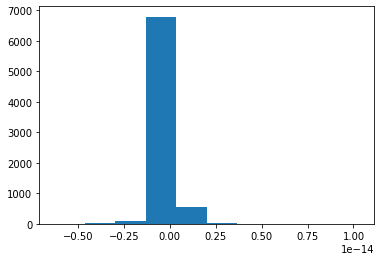

In [10]:
plt.hist(np.mean(rna_train, axis=0))

In [14]:
np.min(np.std(rna_train, axis=0))
np.max(np.std(rna_train, axis=0))

1.0000000000001061

(array([1589.,  717.,  219.,  143.,  128.,  140.,  167.,  209.,  298.,
         198.]),
 array([0.00202987, 0.01017834, 0.01832681, 0.02647528, 0.03462375,
        0.04277222, 0.05092069, 0.05906916, 0.06721763, 0.0753661 ,
        0.08351457]),
 <BarContainer object of 10 artists>)

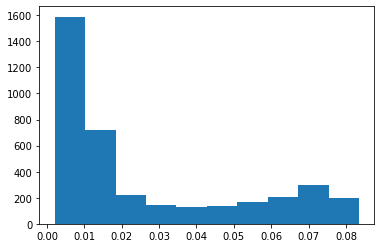

In [15]:
plt.hist(np.mean(atac_train, axis=0))

In [17]:
# A very simple linear regression.

beta_hat = np.linalg.inv(rna_train.T.dot(rna_train)).dot(rna_train.T).dot(atac_train)
print(beta_hat.shape)

In [22]:
from sklearn.metrics import roc_auc_score

roc_auc_score(atac_train.flatten(), rna_train.dot(beta_hat).flatten())
#np.linalg.norm(atac_train - rna_train.dot(beta_hat), ord=2)

0.6163278353564638

In [24]:
atac_test = ar['atac_test_small']
rna_test = ar['rna_test']
roc_auc_score(atac_test.flatten(), rna_test.dot(beta_hat).flatten())

0.49939615770194257